In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../data/train.csv")
print(df.shape)

(6201, 4386)


In [4]:
df.head()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [9]:
df.describe()

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
count,6201,6201,6201,6201,6201,6201,6201,6201,6201,6201,...,6201,6201,6201,6201,6201,6201,6201,6201,6201,6201
unique,6201,26,141,43,25,1,48,145,119,129,...,168,69,33,27,126,61,53,53,35,41
top,TRAIN_0000,BRCA,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
freq,1,786,6053,6157,6176,6201,6153,6045,6079,6069,...,6025,6131,6169,6174,6065,6139,6143,6142,6166,6159


AttributeError: Text.set() got an unexpected keyword argument 'rotate'

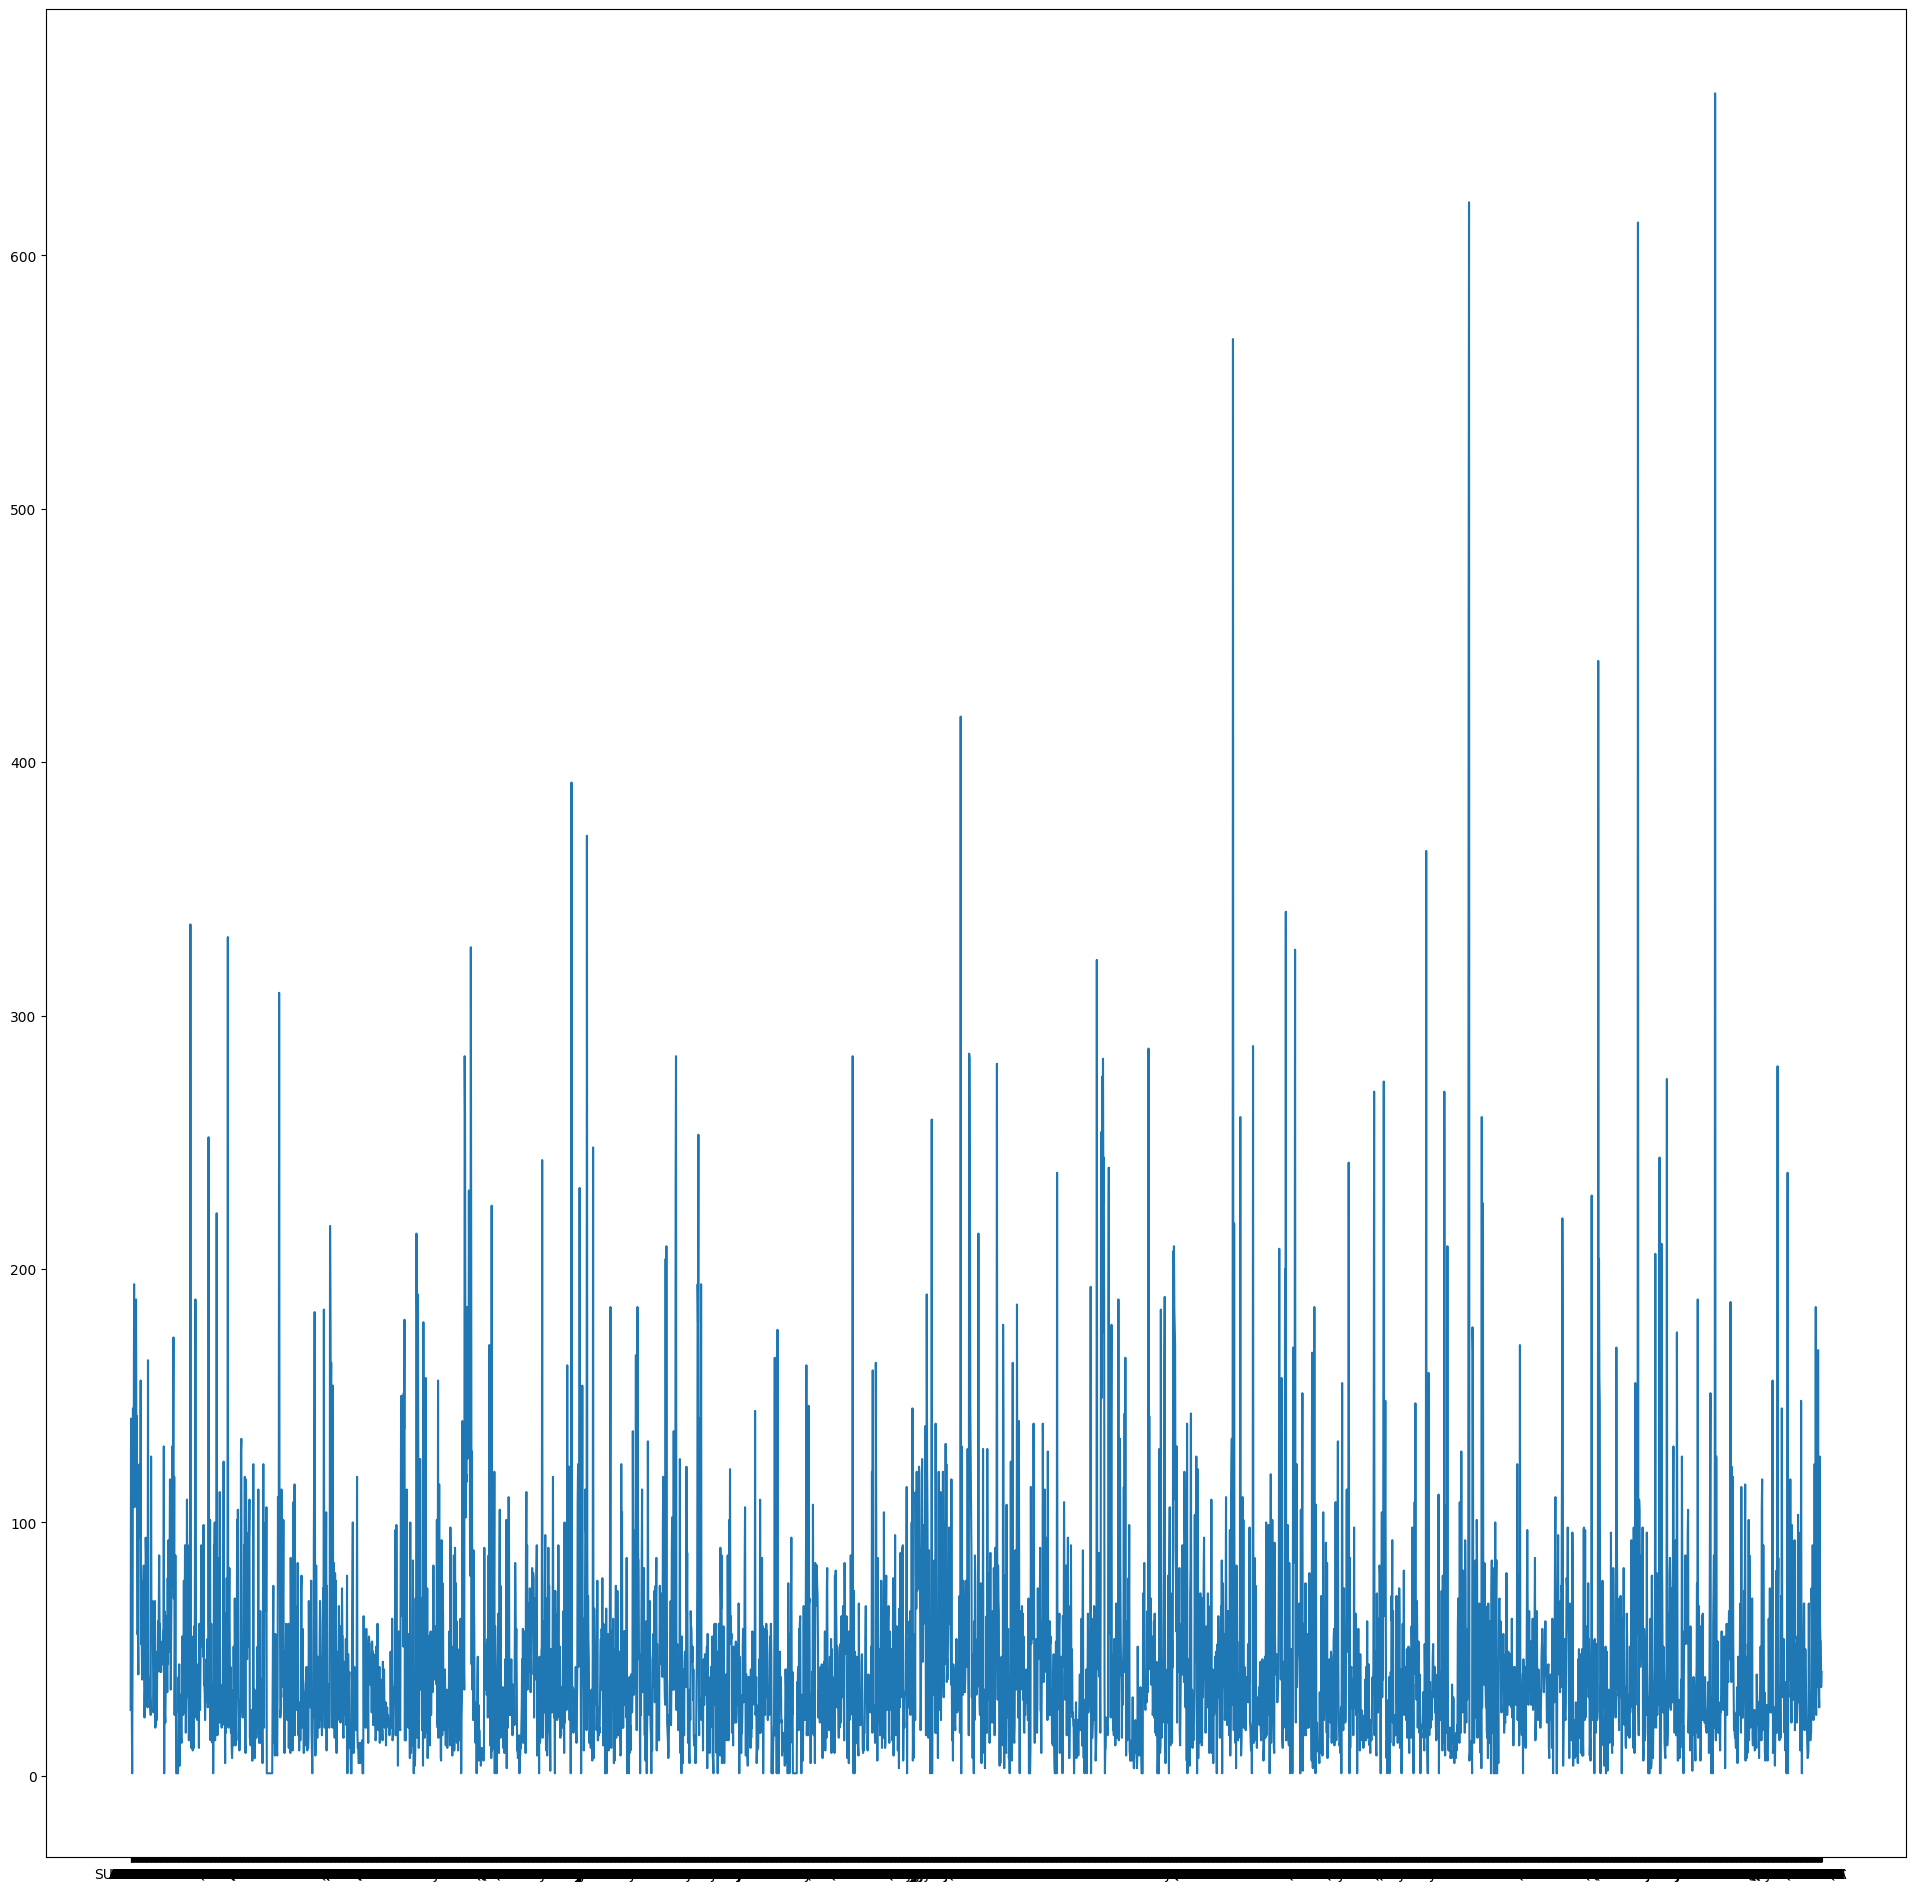

In [26]:
temp = {}
for k, s in df.items():
    if k == "ID":
        continue
    temp[k] = s.nunique()
    
fig = plt.figure(figsize=(24, 24))
ax = fig.gca()
ax.plot(temp.values())
ax.set_xticks(range(len(temp.keys())), temp.keys())
plt.show()



In [19]:
temp = set()
for k, s in df.items():
    if k == "ID":
        continue
    temp.update(s.unique())
    
print(len(temp), temp)


118873 {'G19E', 'N437I', 'G124G M172I R423M R428Q F434F', 'G1474R', 'LSHG315fs', 'E715G', 'K193fs', 'S656L', 'R451H', 'L1207I', 'D19N', 'H1161Q L265I', 'A92K', 'Y36Y', 'G341V', 'A229S', '176_177CE>F*', 'K558R', 'E1642fs', 'F1584F', 'A64fs A64fs', 'S4161S L3939P', 'A267fs', 'L358*', 'E443Q', 'E613E', 'R776I', 'Y147Y', 'G258*', 'E369D F738L', 'L1567R', 'S458S G79R', 'E491K G526E', 'R653R', 'H70R', 'V283M', 'P590A', 'E335*', 'I370T', 'S537S', 'G259E', 'N361S', 'S938F S3029T', 'S178F', 'A348A', 'EI261fs', 'A643D', 'S1669S', 'K611K', 'L237L R164W', 'R463H', 'D1091N D178Y', 'K951K', 'R1582K', 'E87* D745Y E794A', 'P807S', 'L440L W48*', 'G241C', 'A734V', 'S139S S139S', 'I309M', 'S279Y', 'E157K', 'V392A', 'F252L', 'F74fs', 'G143R', 'F1561F G162D', 'P84H', 'C377Y', 'C283C', 'R435H', 'R803*', 'N572N', 'P113fs', 'T92T P66T', 'D146N', 'N241S', 'I619M', 'S2671Y', 'R364P', 'R6170I D6125N A6038A D5255N L3521I K2257E E2187* S1195Y', 'S382T', 'W726L', 'K156R', 'I100V', 'L441F', 'D262N', 'M47I', 'L138L',

In [31]:
partial_uniques = 0
total_unique = set()
for k, s in df.items():
    if k == "ID":
        continue
    partial_uniques += s.nunique()-1 # remove WT
    before = len(total_unique)
    total_unique.update(s.unique())
    after = len(total_unique)
    if (before + len(s.unique()) != after):
        print(k, before, len(s.unique()), after)
partial_uniques += 1

total_uniques = len(total_unique)
    
print(partial_uniques, total_uniques)

AAAS 167 43 209
AADAT 209 25 233
AARS1 233 1 233
ABAT 233 48 280
ABCA1 280 145 424
ABCA2 424 119 542
ABCA3 542 129 669
ABCA4 669 194 862
ABCA5 862 106 963
ABCA6 963 123 1084
ABCA8 1084 146 1229
ABCA9 1229 130 1358
ABCB1 1358 188 1544
ABCB11 1544 119 1660
ABCB4 1660 142 1799
ABCB6 1799 56 1853
ABCB7 1853 57 1908
ABCB8 1908 55 1962
ABCB9 1962 40 2001
ABCC1 2001 114 2114
ABCC2 2114 103 2214
ABCC3 2214 123 2334
ABCC4 2334 94 2426
ABCC5 2426 97 2520
ABCC8 2520 156 2671
ABCD1 2671 52 2718
ABCD2 2718 77 2794
ABCD3 2794 49 2839
ABCE1 2839 38 2876
ABCF2 2876 51 2926
ABCG2 2926 62 2986
ABCG4 2986 75 3059
ABCG8 3059 83 3140
ABHD2 3140 38 3175
ABHD4 3175 23 3197
ABHD6 3197 32 3228
ABI1 3228 38 3264
ABI3BP 3264 94 3355
ABL1 3355 86 3439
ABLIM1 3439 64 3500
ABR 3500 72 3569
ACAA1 3569 28 3593
ACAA2 3593 27 3619
ACACA 3619 164 3781
ACADL 3781 40 3819
ACADM 3819 38 3855
ACADS 3855 31 3884
ACADSB 3884 38 3919
ACADVL 3919 32 3949
ACAT1 3949 28 3976
ACAT2 3976 24 3998
ACE 3998 126 4121
ACHE 4121 53 4165
